# Tests with different dataset sizes

In [5]:
%load_ext autoreload
%autoreload 2
from bandits import LinUCB, ThompsonSampling, Ucb1, Egreedy
from evaluator import evaluate
from matplotlib import pyplot as plt


import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%%time
import dataset
files = ("dataset/R6/ydata-fp-td-clicks-v1_0.20090502","dataset/R6/ydata-fp-td-clicks-v1_0.20090503","dataset/R6/ydata-fp-td-clicks-v1_0.20090509")
dataset.get_yahoo_events(files)

11264756 events with 106 articles
Wall time: 12min 31s


In [3]:
_, deploy = evaluate(Egreedy(1))
rnd_ctr = deploy[-1]

Egreedy (ε=1)       0.0306    1.7m


Egreedy (ε=0.1)     0.0419    1.5m
Egreedy (ε=0.1)     0.0428    53.4s
Egreedy (ε=0.1)     0.0428    30.9s
Egreedy (ε=0.1)     0.0422    15.4s


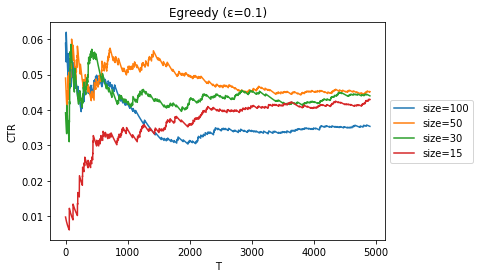

UCB1 (α=0.1)        0.0454    3.1m
UCB1 (α=0.1)        0.0405    1.7m
UCB1 (α=0.1)        0.0438    58.0s
UCB1 (α=0.1)        0.0431    29.3s


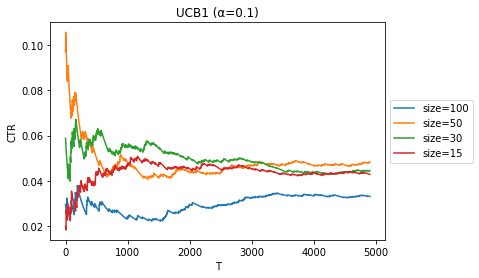

LinUCB (α=0.1)      0.047     27.0m
LinUCB (α=0.1)      0.0485    14.6m
LinUCB (α=0.1)      0.0526    8.5m
LinUCB (α=0.1)      0.0474    4.0m


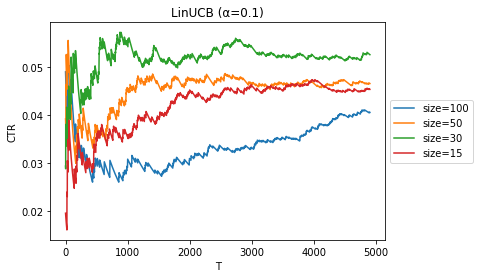

In [6]:
sizes = [100,50,30,15]
results = [['Size','Bucket','Algorithm','CTR Lift']]

algorithms = [Egreedy(0.1),Ucb1(0.1),LinUCB(0.1)]

for test in algorithms:
    for size in sizes:
        learn ,deploy = evaluate(test,size=size)
        results.append([size,'learn',test.algorithm, learn[-1]/rnd_ctr])
        results.append([size,'deploy',test.algorithm, deploy[-1]/rnd_ctr])
        
        plt.plot(deploy[100:5000], label="size={}".format(size))
        
    plt.title(test.algorithm)
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [7]:
df = pd.DataFrame(results)
df.columns = df.iloc[0]
df = df[1:]
df

,Size,Bucket,Algorithm,CTR Lift
1,100,learn,Egreedy (ε=0.1),1.35987
2,100,deploy,Egreedy (ε=0.1),1.36923
3,50,learn,Egreedy (ε=0.1),1.44936
4,50,deploy,Egreedy (ε=0.1),1.40127
5,30,learn,Egreedy (ε=0.1),1.4517
6,30,deploy,Egreedy (ε=0.1),1.4009
7,15,learn,Egreedy (ε=0.1),1.47329
8,15,deploy,Egreedy (ε=0.1),1.37952
9,100,learn,UCB1 (α=0.1),1.41669
10,100,deploy,UCB1 (α=0.1),1.48562
